In [2]:
#loading virtual python ENV
!source ./bin/activate

In [27]:
# importing python libs
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer #fixes missing values
from sklearn.preprocessing import LabelEncoder #fixes missing values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #deals with categorical data
from sklearn.model_selection import train_test_split
#calling DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [4]:
#read in preprocessing data from github
in_df = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv")

In [5]:
print(in_df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [6]:
in_df.head()
df=in_df

In [7]:
# accessing particular columns (syntax for selecing two columnsw
in_df[['Age','Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [8]:
#using data from Iloc (indexing)
df.iloc[:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [9]:
# create machine learning predictive model
# first step is to split data in input and output (supervised model)

input_features = df.iloc[:,0:3].values
labels = df.iloc[:, -1].values

In [10]:
# fix missing values through basic math functions and ML
# fixing age missing value
ashu_impute= SimpleImputer(missing_values=np.nan,strategy='mean') #replaces missing NAN with mean values
ashu_impute.fit(input_features[:,1:3]) # calculating the missing values 
input_features[:, 1:3]= ashu_impute.transform(input_features[:,1:3]) # making changes

In [11]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [12]:
le = LabelEncoder()
label = le.fit_transform(labels)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [13]:
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [14]:
input_features=np.array(ct.fit_transform(input_features))
print(input_features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [15]:
# finally we have input and labe this one we can train to ML Algo
training_input,testing_input, train_label, test_label =train_test_split(input_features, label, test_size=0.1) 
#note test_size (0-1) ---0.1 means 10% testing data size

In [17]:
#calling DecisionTree classifier
classifier= DecisionTreeClassifier()

In [18]:
#Training classifier with above preprocess split data
trained_model=classifier.fit(training_input, train_label)

In [19]:
# we can make predicitons
predicted_values=trained_model.predict(testing_input)

In [20]:
print(predicted_values)

[1 1 0]


In [21]:
print(test_label)

[1 1 0]


In [23]:
accuracy_score(test_label, predicted_values)

1.0

In [26]:
#testing by inputing new random data ---you can try
rfh_new_data=np.array([['Spain', '39', '51000']])

<function matplotlib.pyplot.show(close=None, block=None)>

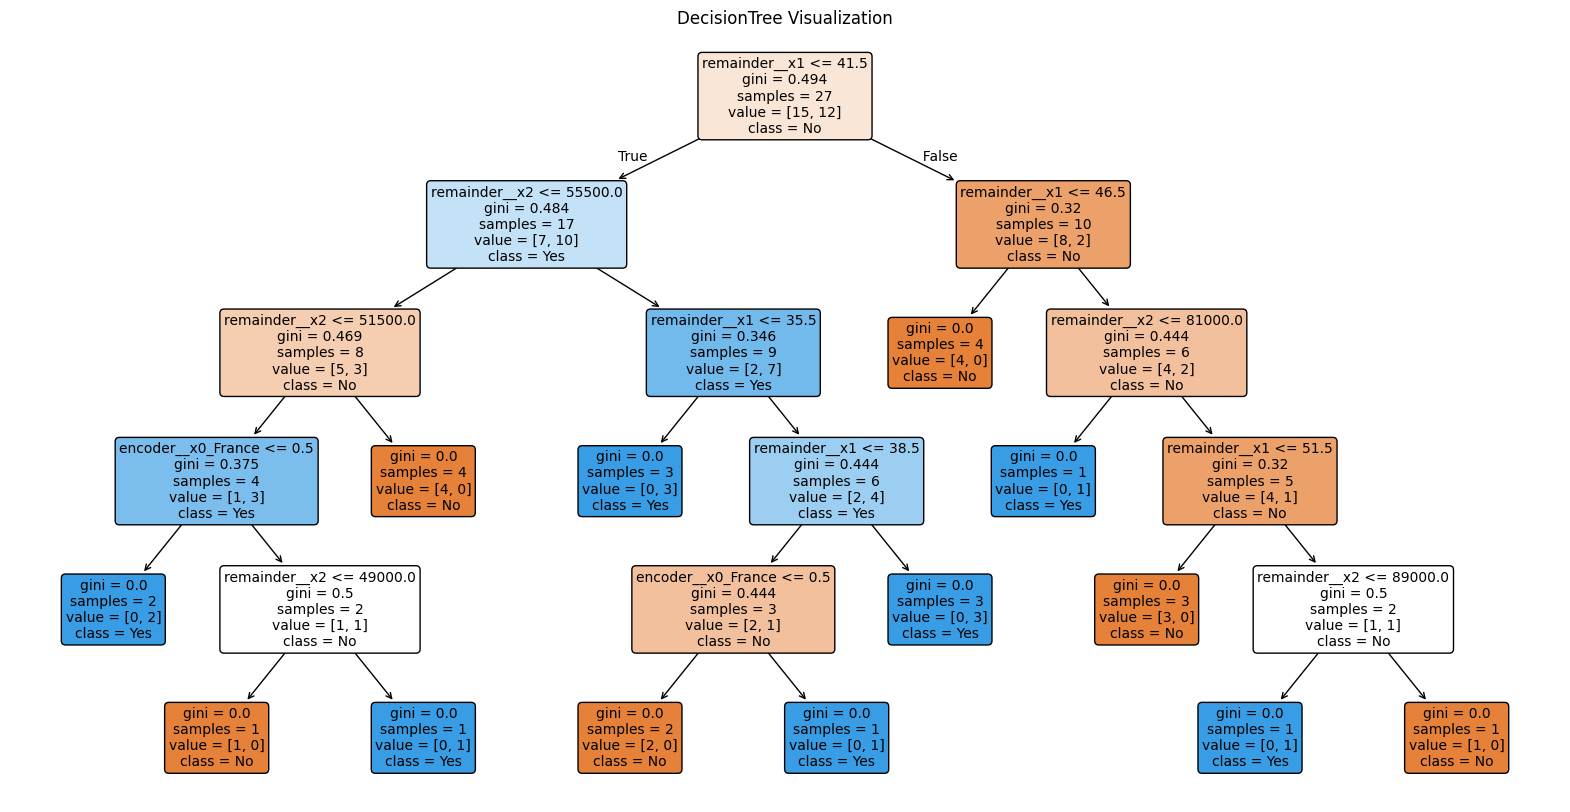

In [34]:
#we can use python to check Decision Tree Graphx
plt.figure(figsize=(20,10))
plot_tree(classifier, 
         feature_names=ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.title("DecisionTree Visualization")
plt.show

In [30]:
#features and labels
#printing names
le.classes_

array(['No', 'Yes'], dtype=object)

In [31]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)